# Load Data

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weather.csv')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


# Exploratory Data Analysis (EDA)

In [3]:
# Cek dimensi data
print("df: ", df.shape)

df:  (13200, 11)


In [4]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
# Mengecek missing value
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [6]:
# Mengecek duplikasi dalam data
df.duplicated().sum()

0

In [7]:
# Statistika deskriptif
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


## Variabel Numerik

In [8]:
# Identifikasi variabel numerik
Numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

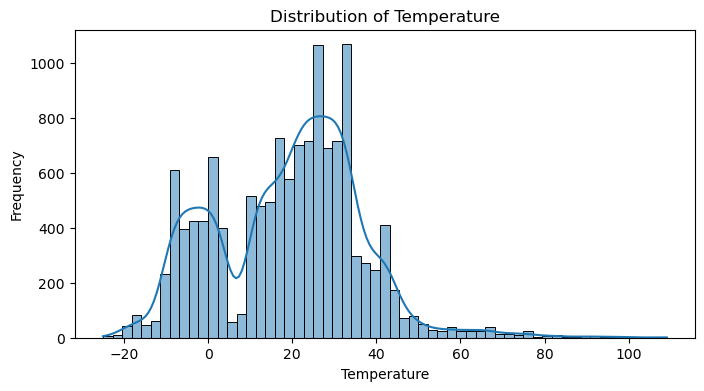

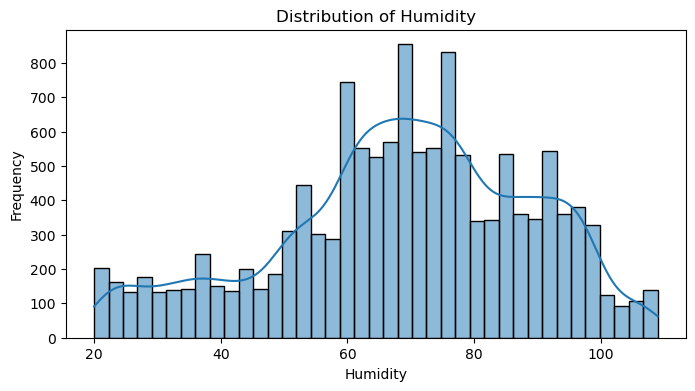

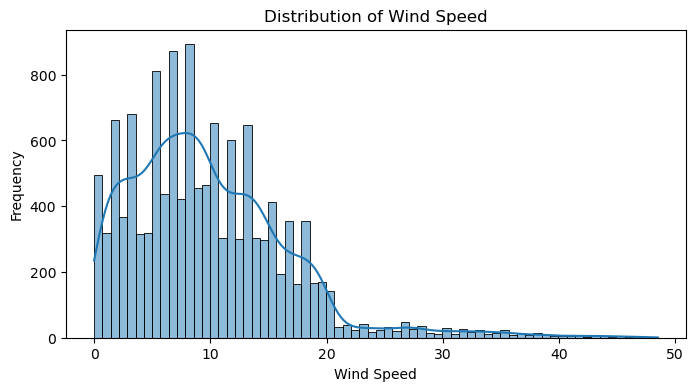

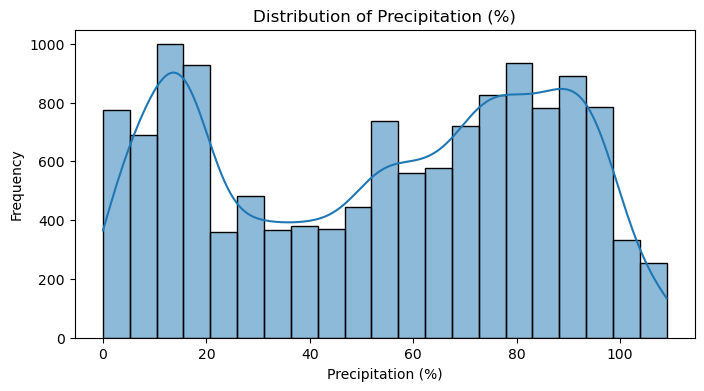

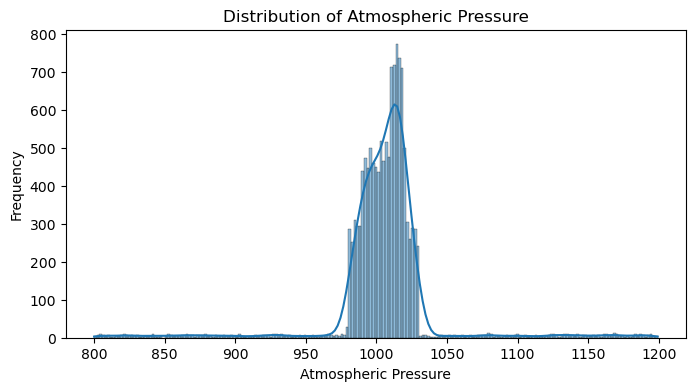

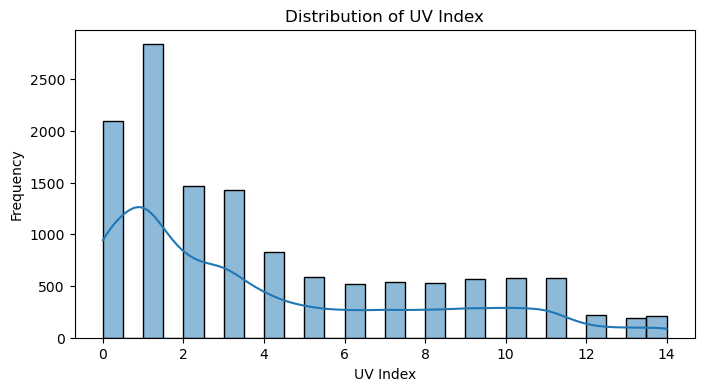

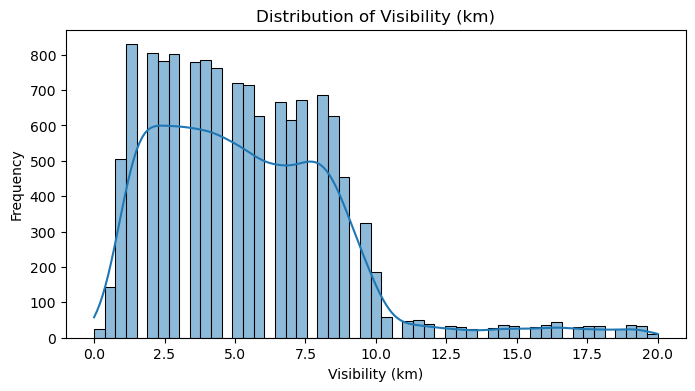

In [9]:
# Mengecek distribusi masing-masing variabel numerik
for col in Numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Variabel Kategorik

In [10]:
# Indentifikasi variabel kategorik
Categorical_Cols=[]
for columns in df:
    if df[columns].dtypes=='object':
        Categorical_Cols.append(columns)
Categorical_Cols

['Cloud Cover', 'Season', 'Location', 'Weather Type']

In [11]:
# Melihat nilai unik dari kolom kategorik
for columns in Categorical_Cols:
    print(f'{columns} : {df[columns].unique()}')

Cloud Cover : ['partly cloudy' 'clear' 'overcast' 'cloudy']
Season : ['Winter' 'Spring' 'Summer' 'Autumn']
Location : ['inland' 'mountain' 'coastal']
Weather Type : ['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [12]:
# Melihat total curah hujan (precipitation) yang tercatat untuk setiap musim
df_Precipitation = df.groupby(['Season'])['Precipitation (%)'].sum().reset_index()
df_Precipitation

,Season,Precipitation (%)
0,Autumn,117644.0
1,Spring,120504.0
2,Summer,117484.0
3,Winter,352474.0


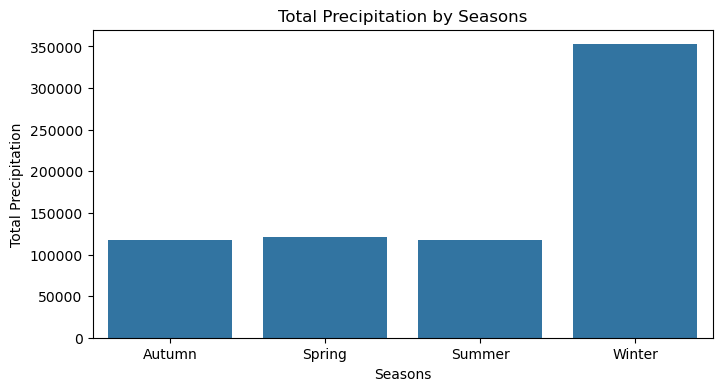

In [13]:
# Membuat plot curah hujan
plt.figure(figsize=(8,4))
sns.barplot(x='Season', y='Precipitation (%)',data=df_Precipitation)
plt.title('Total Precipitation by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Precipitation')
plt.show()

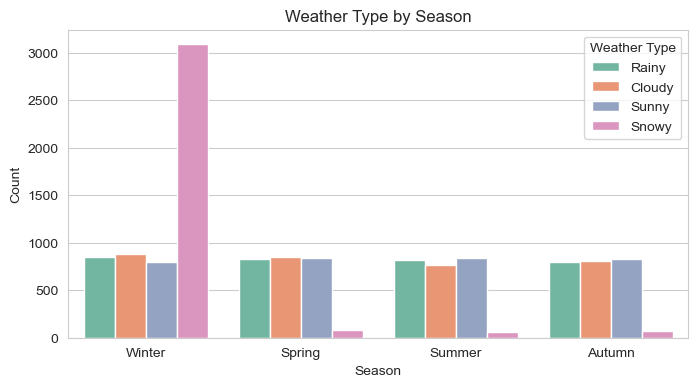

In [14]:
# Bar plot berbagai jenis cuaca berdasarkan musim
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Season', hue='Weather Type', palette='Set2')
ax.set_title('Weather Type by Season')
ax.set_xlabel('Season')
ax.set_ylabel('Count')
plt.legend(title='Weather Type')
plt.show()

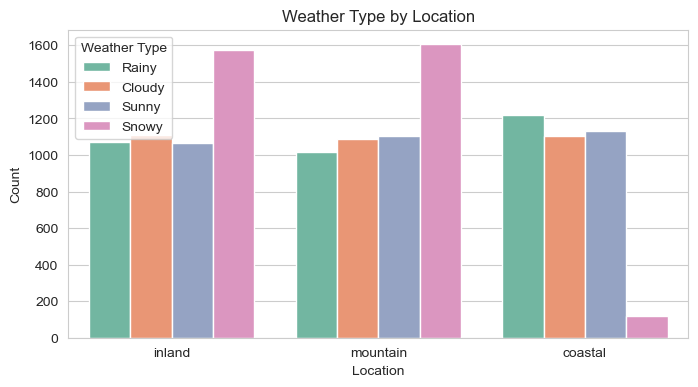

In [15]:
# Bar plot berbagai jenis cuaca berdasarkan lokasi

sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Location', hue='Weather Type', palette='Set2')
ax.set_title('Weather Type by Location')
ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.legend(title='Weather Type')
plt.show()

# Data Preprocessing

In [16]:
# Encoding variabel kategorik
for column in Categorical_Cols:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

    print(f"Mapping of labels to integers for column '{column}':")
    for label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"{label}: {encoded_value}")
    print("\n")

Mapping of labels to integers for column 'Cloud Cover':
clear: 0
cloudy: 1
overcast: 2
partly cloudy: 3


Mapping of labels to integers for column 'Season':
Autumn: 0
Spring: 1
Summer: 2
Winter: 3


Mapping of labels to integers for column 'Location':
coastal: 0
inland: 1
mountain: 2


Mapping of labels to integers for column 'Weather Type':
Cloudy: 0
Rainy: 1
Snowy: 2
Sunny: 3




In [17]:
# Scaling variabel numerik
scaler = MinMaxScaler()
df[Numerical_cols] = scaler.fit_transform(df[Numerical_cols])

In [18]:
# Menghapus Outlier
def remove_outliers(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [19]:
df_cleaned = remove_outliers(df)

In [20]:
df_cleaned

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,0.291045,0.595506,0.195876,0.752294,3,0.527951,0.142857,3,0.175,1,1
1,0.477612,0.853933,0.175258,0.651376,3,0.529480,0.500000,1,0.500,1,0
2,0.410448,0.494382,0.144330,0.146789,0,0.547746,0.357143,1,0.275,2,3
3,0.470149,0.707865,0.030928,0.752294,0,0.566614,0.500000,1,0.050,0,3
4,0.388060,0.606742,0.350515,0.605505,2,0.477461,0.071429,3,0.125,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13194,0.402985,0.471910,0.268041,0.155963,2,0.507880,0.142857,1,0.250,0,0
13195,0.261194,0.606742,0.298969,0.651376,2,0.508732,0.071429,2,0.050,2,1
13197,0.410448,0.640449,0.113402,0.256881,2,0.532637,0.214286,0,0.450,0,0
13198,0.208955,0.629213,0.206186,0.862385,2,0.461425,0.000000,3,0.100,1,2


# Separation

In [21]:
X = df_cleaned.drop('Weather Type',axis='columns')
y = df_cleaned['Weather Type']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [23]:
len(X_train.columns)

10

# Choosing Model

In [24]:
# Load Library
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neural_network import MLPClassifier

In [25]:
# Daftar model yang akan dievaluasi
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))
models.append(('ANN', MLPClassifier(max_iter=100)))

# Evaluasi setiap model bergiliran
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.911523 (0.003093)
LDA: 0.933536 (0.006986)
KNN: 0.952417 (0.006077)
NB: 0.952848 (0.005695)
SVM: 0.944433 (0.005565)
RF: 0.976262 (0.003804)
ANN: 0.963207 (0.004586)


# Model Random Forest (RF)

In [26]:
# Separation
X = df_cleaned.drop('Weather Type',axis='columns')
y = df_cleaned['Weather Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=47)

# Melatih model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=47)

In [28]:
# Memprediksi data uji
y_pred = rf_model.predict(X_test)

# Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9750
Confusion Matrix:
[[587  13   2   5]
 [ 16 548   1   0]
 [  3   2 560   3]
 [ 12   0   1 565]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       607
           1       0.97      0.97      0.97       565
           2       0.99      0.99      0.99       568
           3       0.99      0.98      0.98       578

    accuracy                           0.97      2318
   macro avg       0.98      0.98      0.98      2318
weighted avg       0.98      0.97      0.98      2318



## Hyperparameter Tuning

In [29]:
# Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definisikan hyperparameter grid untuk pencarian
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam hutan
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah minimum sampel yang diperlukan untuk membagi node internal
    'min_samples_leaf': [1, 2, 4],    # Jumlah minimum sampel yang diperlukan untuk menjadi node daun
    'bootstrap': [True, False]        # Apakah menggunakan bootstrap samples untuk membangun pohon
}

# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=47)

# Inisialisasi GridSearchCV dengan model, parameter grid, dan cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Membagi dataset menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Melatih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Mencetak parameter terbaik yang ditemukan
print("Best Parameters:", grid_search.best_params_)

# Menggunakan model terbaik untuk prediksi pada data uji
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [30]:
# Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9749784296807593
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       607
           1       0.97      0.97      0.97       565
           2       0.99      0.99      0.99       568
           3       0.99      0.98      0.98       578

    accuracy                           0.97      2318
   macro avg       0.98      0.98      0.98      2318
weighted avg       0.98      0.97      0.98      2318



## Cross-Validation

In [31]:
# Implementasi cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Menggunakan parameter terbaik dari GridSearchCV
best_params = grid_search.best_params_

# Membuat instance model dengan parameter terbaik
best_rf = RandomForestClassifier(**best_params)

# Melakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')

# Menampilkan hasil cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.97670406 0.97755719 0.97280967 0.98100993 0.97367285]
Mean Cross-Validation Score: 0.9764
Standard Deviation of Cross-Validation Scores: 0.0029


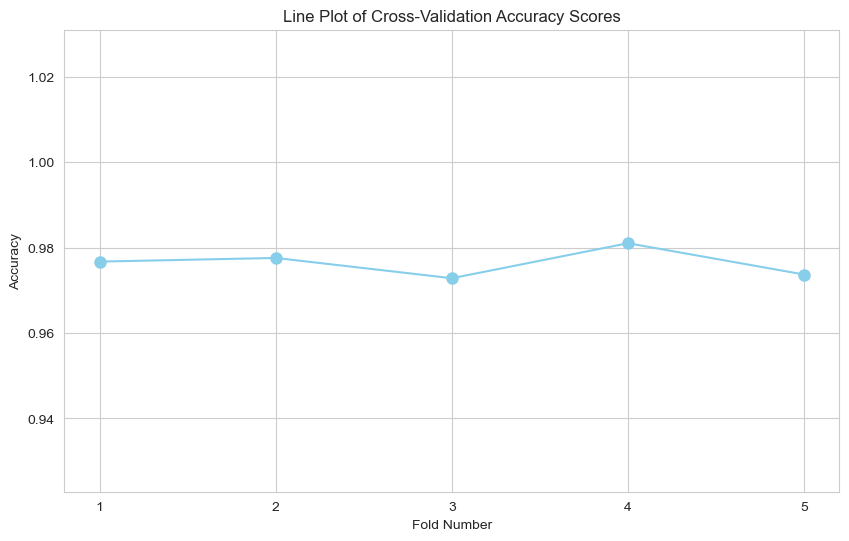

In [32]:
import matplotlib.pyplot as plt
# Menyusun data untuk visualisasi
folds = range(1, len(cv_scores) + 1)
scores = cv_scores

# Visualisasi diagram garis untuk skor akurasi cross-validation
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='skyblue', markersize=8)
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Line Plot of Cross-Validation Accuracy Scores')
plt.xticks(range(1, len(scores) + 1))  # Set x-ticks to range 1 to the number of folds
plt.ylim([min(scores) - 0.05, max(scores) + 0.05])  # Adjust y-axis range to add some padding
plt.grid(True)
plt.show()


## Confussion Matrix

In [33]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
import pandas as pd

# Melatih model pada seluruh data
best_rf.fit(X, y)

# Memprediksi data dengan model yang telah dilatih
y_pred = best_rf.predict(X)

# Menghitung matriks kebingungan
cm = confusion_matrix(y, y_pred)

# Membuat DataFrame untuk matriks kebingungan
cm_df = pd.DataFrame(cm, index=['Cloudy', 'Rainy', 'Snowy','Sunny'], columns=['Predict Cloudy', 'Predict Rainy', 'Predict Snowy','Predict Sunny'])

# Menampilkan matriks kebingungan
print('Confusion Matrix:')
print(cm_df)

Confusion Matrix:
        Predict Cloudy  Predict Rainy  Predict Snowy  Predict Sunny
Cloudy            2960              0              0              0
Rainy                0           2810              0              0
Snowy                0              0           2875              0
Sunny                0              0              0           2941


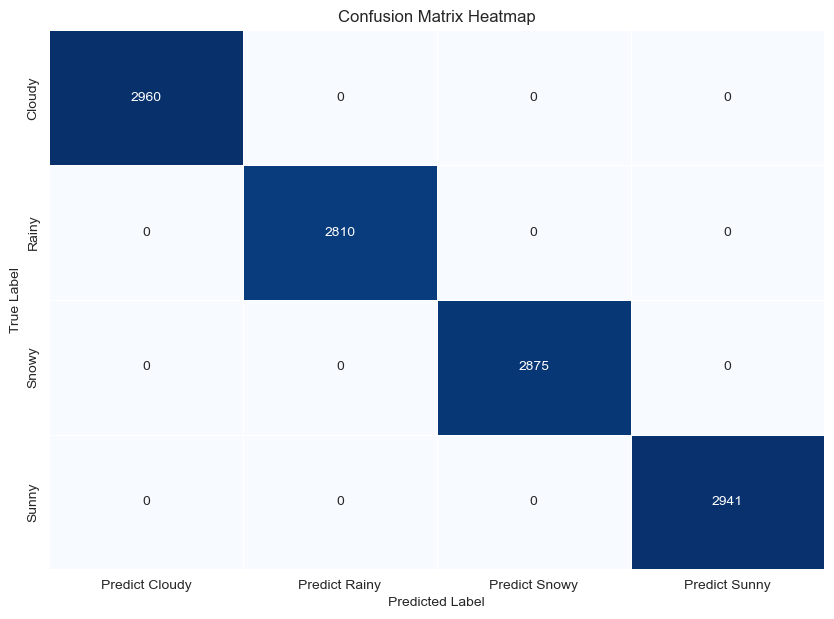

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap confussion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Visualisasi Model dan Feature Importances

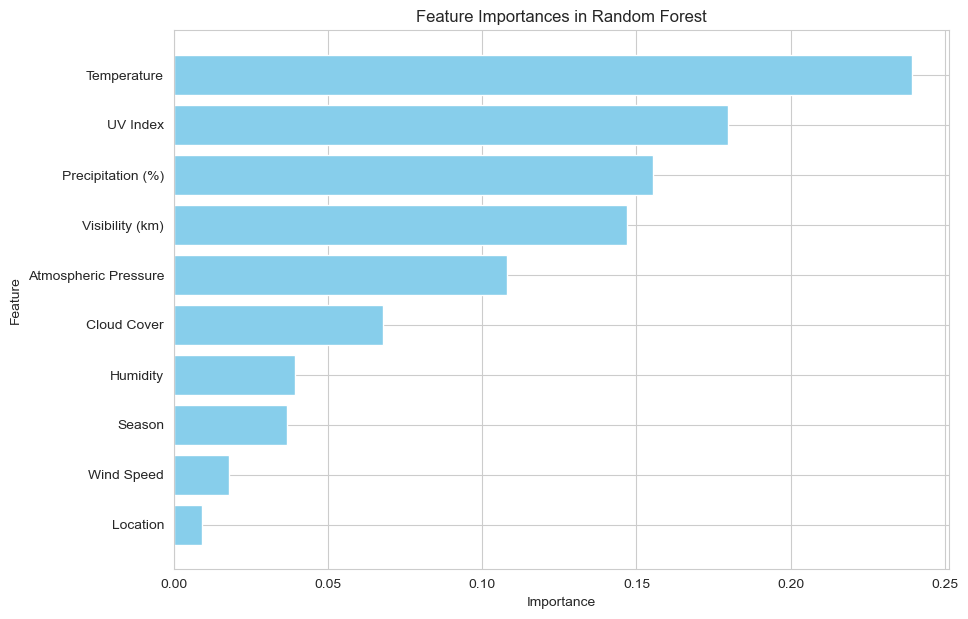

In [35]:
# Visualisasi feature importances
import matplotlib.pyplot as plt

# Melatih model RandomForestClassifier pada seluruh data
best_rf.fit(X, y)

# Mendapatkan feature importances dari model
importances = best_rf.feature_importances_

# Membuat DataFrame untuk fitur dan importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi feature importances
plt.figure(figsize=(10, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.show()

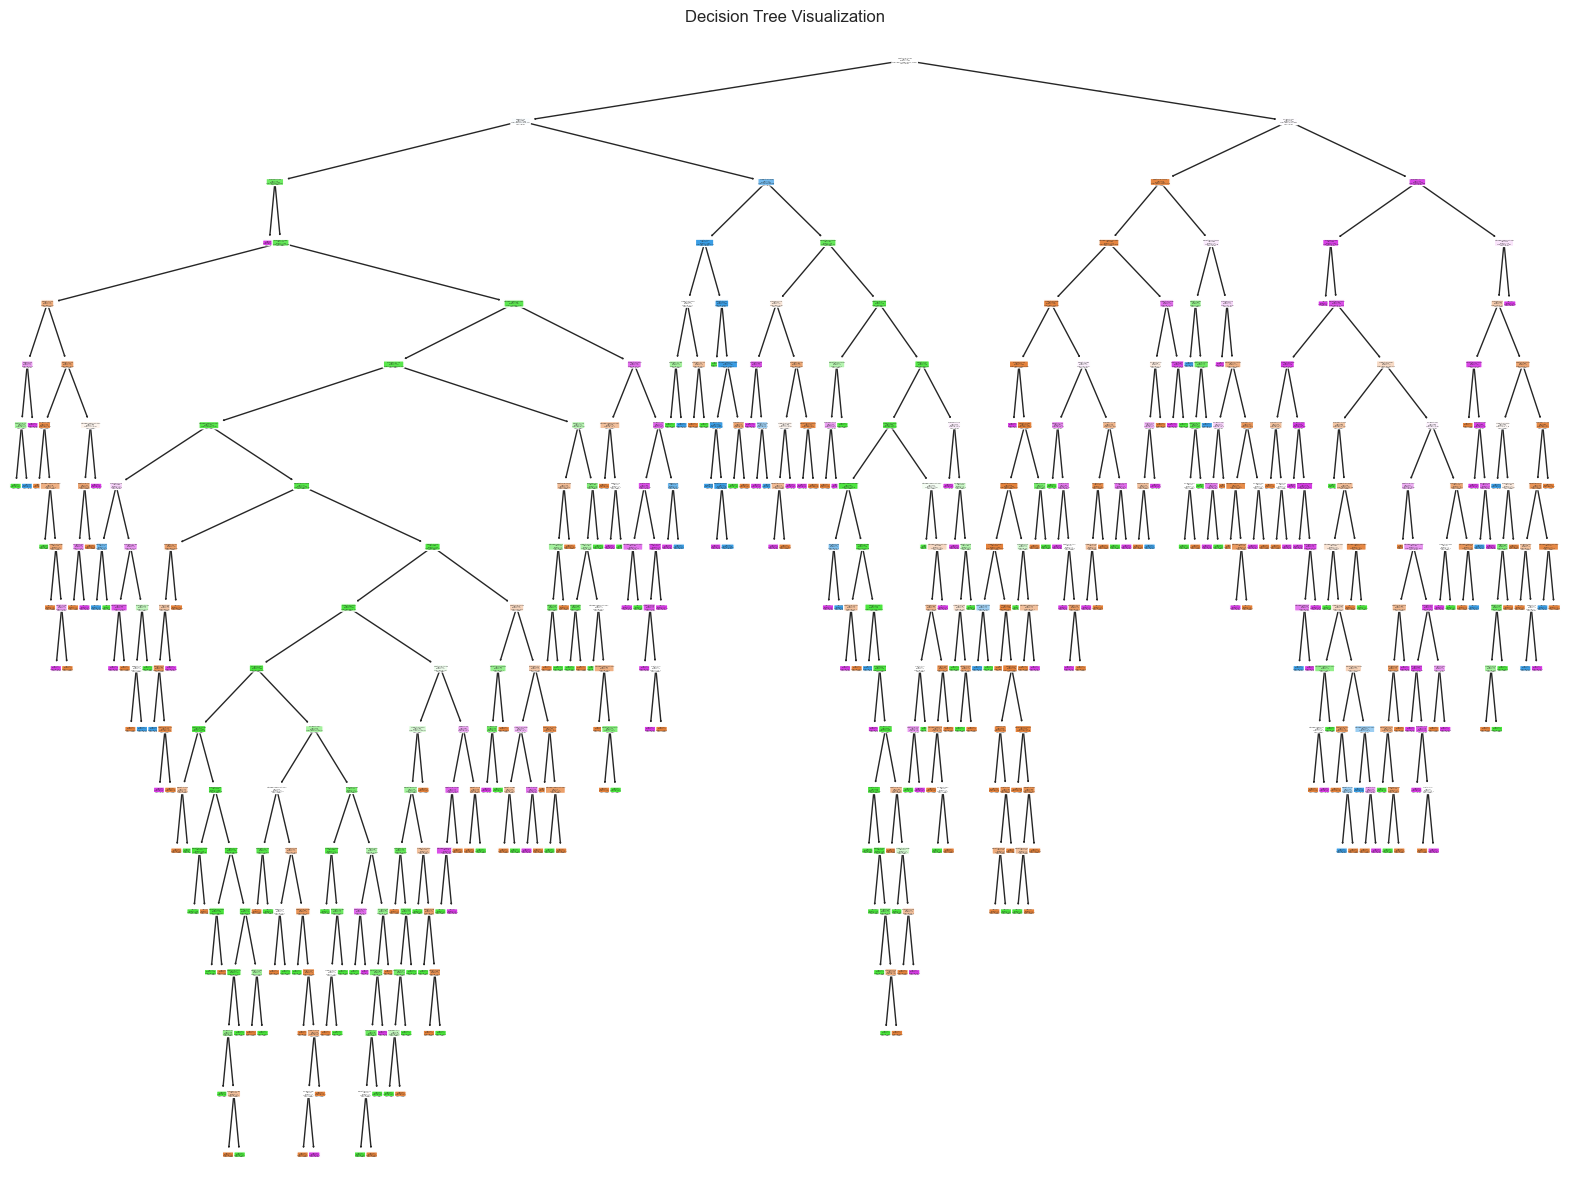

In [36]:
# Visualisasi model random forest
from sklearn.tree import plot_tree

# Memilih pohon keputusan pertama dari model RandomForest
tree = best_rf.estimators_[0]

# Visualisasi pohon keputusan
plt.figure(figsize=(20, 15))
plot_tree(tree, feature_names=X.columns, class_names=['Cloudy', 'Rainy', 'Snowy','Sunny'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Model Artificial Neural Network (ANN)

In [37]:
# Separation
X = df_cleaned.drop('Weather Type',axis='columns')
y = df_cleaned['Weather Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Membangun model ANN
model = Sequential()

# Menambahkan layer input dengan jumlah neuron sesuai dengan fitur input
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Menambahkan layer tersembunyi
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout untuk mencegah overfitting

# Menambahkan layer output dengan jumlah neuron sesuai dengan jumlah kelas
model.add(Dense(len(y.unique()), activation='softmax'))

# Menyusun model dengan optimizer dan loss function
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model dengan data pelatihan
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

# Mengevaluasi model dengan data uji
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')


Epoch 1/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5481 - loss: 1.0818 - val_accuracy: 0.8889 - val_loss: 0.4546
Epoch 2/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.4747 - val_accuracy: 0.9061 - val_loss: 0.3150
Epoch 3/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8979 - loss: 0.3699 - val_accuracy: 0.9450 - val_loss: 0.2532
Epoch 4/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9096 - loss: 0.3205 - val_accuracy: 0.9369 - val_loss: 0.2355
Epoch 5/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9247 - loss: 0.2855 - val_accuracy: 0.9525 - val_loss: 0.2031
Epoch 6/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9254 - loss: 0.2662 - val_accuracy: 0.9525 - val_loss: 0.1921
Epoch 7/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9328 - loss: 0.2625 - val_accuracy: 0.9531 - val_loss: 0.1812
Epoch 8/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9417 - loss: 0.2307 - val_accuracy: 0.

In [39]:
# Membuat prediksi dengan data uji
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Akurasi: {accuracy:.2f}")

# Menghasilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Menghasilkan classification report
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Akurasi: 0.97
Confusion Matrix:
[[577  26   1   3]
 [ 12 552   0   1]
 [  4   1 561   2]
 [ 20   7   0 551]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       607
           1       0.94      0.98      0.96       565
           2       1.00      0.99      0.99       568
           3       0.99      0.95      0.97       578

    accuracy                           0.97      2318
   macro avg       0.97      0.97      0.97      2318
weighted avg       0.97      0.97      0.97      2318



## Hyperparameter Tuning

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Fungsi untuk membangun model dengan parameter
def build_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(y.unique()), activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Membungkus model dengan KerasClassifier
model = KerasClassifier(model=build_model)

# Mendefinisikan grid search parameter
param_grid = {
    'model__learning_rate': [0.001, 0.01],
    'model__dropout_rate': [0.3, 0.5],
    'epochs': [10, 20],
    'batch_size': [16, 32]
}

# Menerapkan GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid.fit(X_train, y_train)

# Menampilkan hasil terbaik
print(f'Best Score: {grid_result.best_score_}')
print(f'Best Params: {grid_result.best_params_}')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5723 - loss: 1.0026
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.8921 - loss: 0.3745
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.9215 - loss: 0.2928
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9402 - loss: 0.2495
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9429 - loss: 0.2288
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.9480 - loss: 0.2161
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9464 - loss: 0.2141
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.9533 - loss: 0.1878
Epoch 9/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.9509 - loss: 0.1933
Epoch 10/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.9543 - loss: 0.1758
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
Epoch 1/10
387/387 ━━

In [41]:
from sklearn.metrics import classification_report, accuracy_score

# Menggunakan model terbaik dari grid search untuk memprediksi data uji
y_pred_classes = grid_result.best_estimator_.predict(X_test)

# Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred_classes)
report = classification_report(y_test, y_pred_classes)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy: 0.9667817083692839
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       607
           1       0.94      0.97      0.96       565
           2       1.00      0.99      0.99       568
           3       0.99      0.96      0.97       578

    accuracy                           0.97      2318
   macro avg       0.97      0.97      0.97      2318
weighted avg       0.97      0.97      0.97      2318



## Cross-Validation

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Fungsi untuk membangun model dengan parameter
def build_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(y.unique()), activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Membungkus model dengan KerasClassifier
model = KerasClassifier(model=build_model,
                        learning_rate=0.01,  # Parameter terbaik dari Grid Search
                        dropout_rate=0.3,    # Parameter terbaik dari Grid Search
                        epochs=20,           # Parameter terbaik dari Grid Search
                        batch_size=16)       # Parameter terbaik dari Grid Search

# Menerapkan cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Menampilkan hasil cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {np.mean(cv_scores):.4f}')
print(f'Standard Deviation: {np.std(cv_scores):.4f}')

Epoch 1/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.7793 - loss: 0.5621
Epoch 2/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.9221 - loss: 0.2778
Epoch 3/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.9405 - loss: 0.2142
Epoch 4/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9471 - loss: 0.1912
Epoch 5/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.9450 - loss: 0.1830
Epoch 6/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9537 - loss: 0.1759
Epoch 7/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.9510 - loss: 0.1719
Epoch 8/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.9461 - loss: 0.1878
Epoch 9/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9499 - loss: 0.1718
Epoch 10/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.9555 - loss: 0.1578
Epoch 11/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9502 - loss: 0.1654
Epoch 12/20
464/464 ━━━━━━━━━━━━

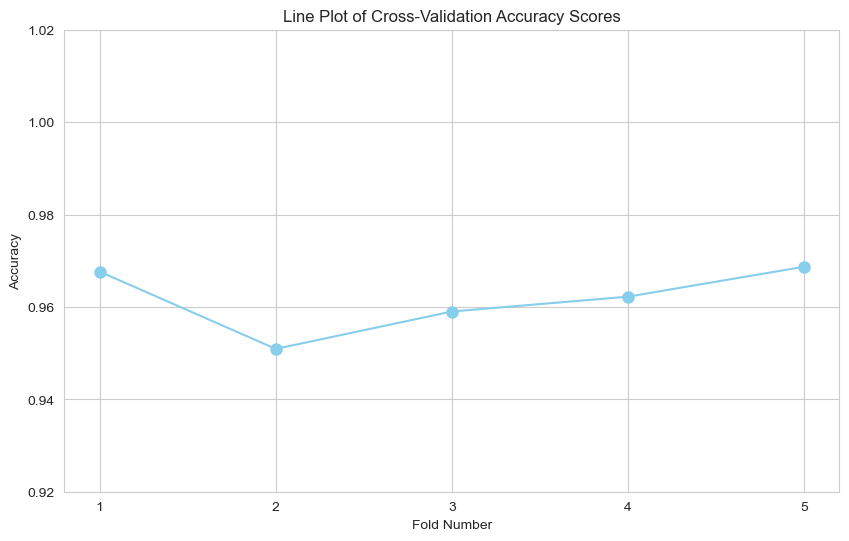

In [43]:
# Menyusun data untuk visualisasi
folds = range(1, len(cv_scores) + 1)
scores = cv_scores

# Visualisasi diagram garis untuk skor akurasi cross-validation
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='skyblue', markersize=8)
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Line Plot of Cross-Validation Accuracy Scores')
plt.xticks(range(1, len(scores) + 1))  # Set x-ticks to range 1 to the number of folds
plt.ylim([0.92, 1.02])  # Set y-axis range from 0.92 to 1.02
plt.grid(True)
plt.show()

## Confussion Matrix

In [44]:
# Confussion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan model terbaik dari grid search untuk memprediksi data uji
y_pred_classes = grid_result.best_estimator_.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Menampilkan confusion matrix sebagai DataFrame
cm_df = pd.DataFrame(cm, index=['Cloudy', 'Rainy', 'Snowy','Sunny'], columns=['Predict Cloudy', 'Predict Rainy', 'Predict Snowy','Predict Sunny'])
print(cm_df)

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
        Predict Cloudy  Predict Rainy  Predict Snowy  Predict Sunny
Cloudy             578             26              1              2
Rainy               15            548              1              1
Snowy                4              1            561              2
Sunny               19              5              0            554


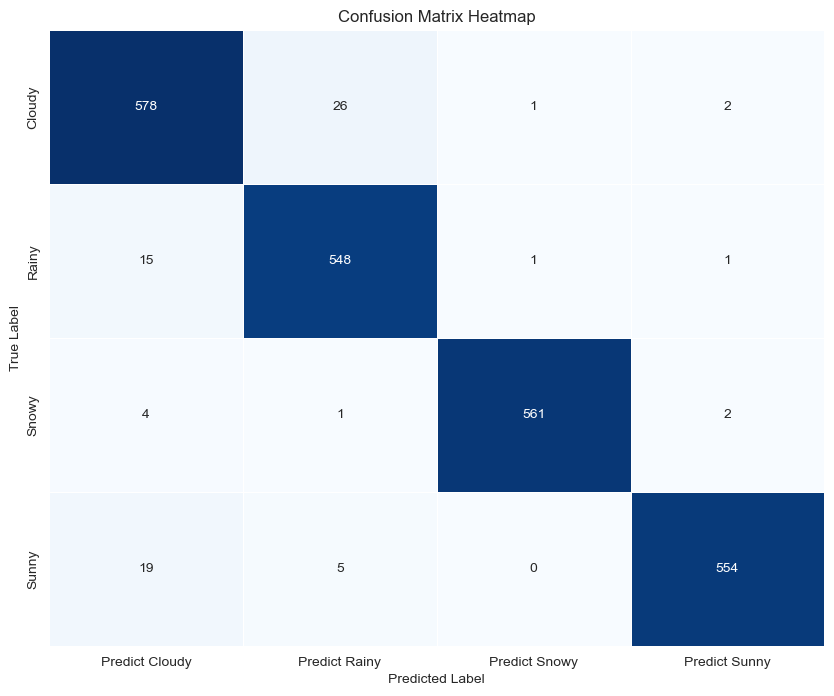

In [45]:
# Heatmap confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Visualisasi 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Pastikan y_train berisi nilai label yang valid
# Menggunakan LabelEncoder untuk memastikan label berada dalam rentang yang benar
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Fungsi untuk membangun model dengan parameter terbaik
def build_best_model(learning_rate=0.01, dropout_rate=0.3):
    num_classes = len(np.unique(y_train))  # Mendapatkan jumlah kelas secara dinamis
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))  # Menyesuaikan jumlah unit dengan jumlah kelas
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Membuat model terbaik dengan parameter terbaik
best_model = build_best_model(
    learning_rate=0.01,
    dropout_rate=0.3
)

# Melatih model terbaik dengan data pelatihan dan simpan riwayat
history = best_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7856 - loss: 0.5731 - val_accuracy: 0.9488 - val_loss: 0.1689
Epoch 2/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9423 - loss: 0.2227 - val_accuracy: 0.9644 - val_loss: 0.1295
Epoch 3/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9425 - loss: 0.2053 - val_accuracy: 0.9639 - val_loss: 0.1478
Epoch 4/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9409 - loss: 0.2006 - val_accuracy: 0.9547 - val_loss: 0.1507
Epoch 5/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9446 - loss: 0.1832 - val_accuracy: 0.9439 - val_loss: 0.1809
Epoch 6/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9552 - loss: 0.1625 - val_accuracy: 0.9660 - val_loss: 0.1148
Epoch 7/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9515 - loss: 0.1598 - val_accuracy: 0.9612 - val_loss: 0.1327
Epoch 8/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9526 - loss: 0.1519 - val_accuracy: 0.

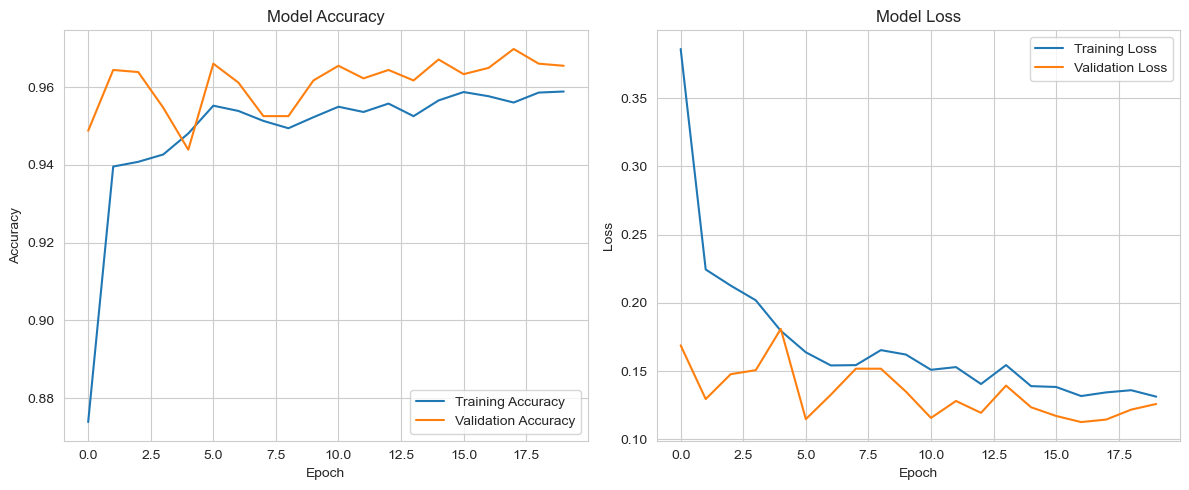

In [47]:
# Plotting accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Model Naive Bayes (NB)

In [48]:
# Separation
X = df_cleaned.drop('Weather Type',axis='columns')
y = df_cleaned['Weather Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membuat instance model Naive Bayes
nb_model = GaussianNB()

# Melatih model dengan data pelatihan
nb_model.fit(X_train, y_train)

GaussianNB()

In [50]:
# Melakukan prediksi dengan data uji
y_pred = nb_model.predict(X_test)

# Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9564
Confusion Matrix:
[[554  32   1  20]
 [ 12 543   8   2]
 [  2   2 561   3]
 [  8  11   0 559]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       607
           1       0.92      0.96      0.94       565
           2       0.98      0.99      0.99       568
           3       0.96      0.97      0.96       578

    accuracy                           0.96      2318
   macro avg       0.96      0.96      0.96      2318
weighted avg       0.96      0.96      0.96      2318



## Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Mendefinisikan model
gnb = GaussianNB()

# Mendefinisikan parameter grid (biasanya GaussianNB tidak memerlukan banyak parameter tuning)
param_grid = {
    # Untuk GaussianNB, parameter tunable adalah:
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Parameter untuk menghindari nilai varians yang sangat kecil
}

# Menciptakan objek GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Melatih GridSearchCV dengan data pelatihan
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Menggunakan model terbaik untuk prediksi pada data uji
y_pred = grid_search.predict(X_test)

Best parameters found: {'var_smoothing': 1e-09}
Best cross-validation score: 0.9533


In [52]:
# Mengevaluasi model terbaik
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)

Test Accuracy: 0.9564
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       607
           1       0.92      0.96      0.94       565
           2       0.98      0.99      0.99       568
           3       0.96      0.97      0.96       578

    accuracy                           0.96      2318
   macro avg       0.96      0.96      0.96      2318
weighted avg       0.96      0.96      0.96      2318



## Cross-Validation

In [53]:
# Implementasi Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Menggunakan parameter terbaik dari GridSearchCV
best_params = grid_search.best_params_

# Membuat instance model dengan parameter terbaik
best_gnb = GaussianNB(**best_params)

# Melakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(best_gnb, X, y, cv=5, scoring='accuracy')

# Menampilkan hasil cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.9529767  0.95597756 0.95468278 0.95468278 0.95079845]
Mean Cross-Validation Score: 0.9538
Standard Deviation of Cross-Validation Scores: 0.0018


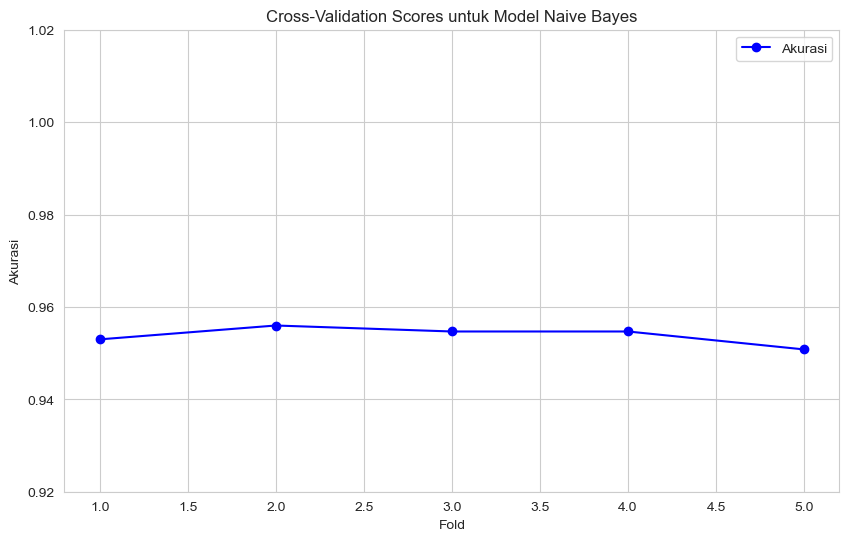

In [54]:
# Plot hasil cross-validation
import matplotlib.pyplot as plt
import numpy as np

# Menyusun data untuk grafik
folds = np.arange(1, len(cv_scores) + 1)
scores = cv_scores

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(folds, scores, marker='o', linestyle='-', color='b', label='Akurasi')

# Menambahkan judul dan label sumbu
plt.title('Cross-Validation Scores untuk Model Naive Bayes')
plt.xlabel('Fold')
plt.ylabel('Akurasi')

# Menetapkan rentang sumbu Y
plt.ylim(0.92, 1.02)

# Menambahkan grid
plt.grid(True)

# Menampilkan legenda
plt.legend()

# Menampilkan grafik
plt.show()

## Confussion Matrix

In [55]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan model terbaik dari GridSearchCV untuk memprediksi data uji
y_pred_classes = grid_search.best_estimator_.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Menampilkan confusion matrix sebagai DataFrame
cm_df = pd.DataFrame(cm, index=['Cloudy', 'Rainy', 'Snowy', 'Sunny'],
                     columns=['Predict Cloudy', 'Predict Rainy', 'Predict Snowy', 'Predict Sunny'])
print("Confusion Matrix DataFrame:")
print(cm_df)

Confusion Matrix DataFrame:
        Predict Cloudy  Predict Rainy  Predict Snowy  Predict Sunny
Cloudy             554             32              1             20
Rainy               12            543              8              2
Snowy                2              2            561              3
Sunny                8             11              0            559


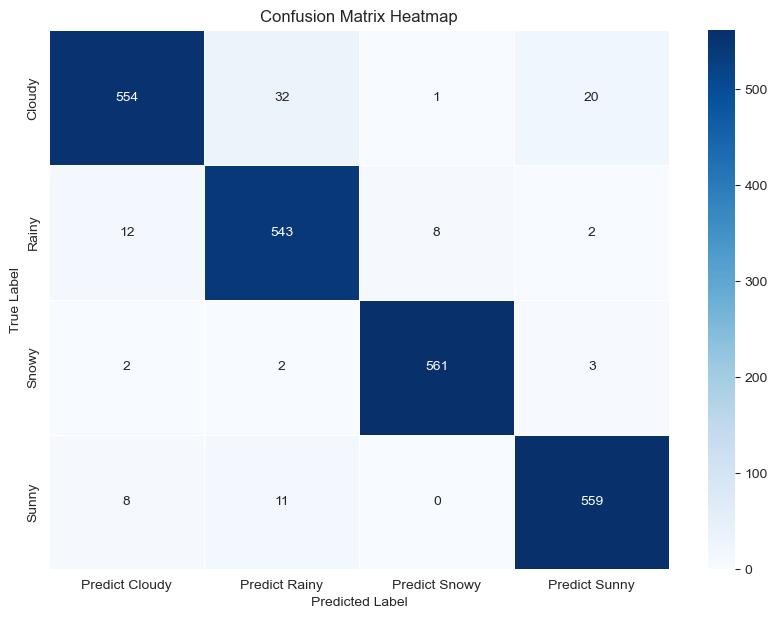

In [56]:
# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

# Menambahkan judul dan label sumbu
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Menampilkan heatmap
plt.show()

## Visualisasi model

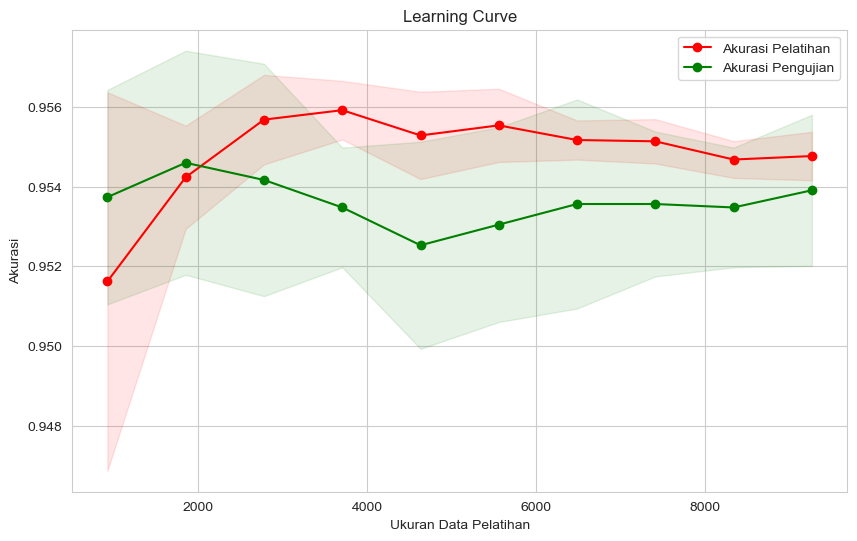

In [57]:
# Plot learning curve
from sklearn.model_selection import learning_curve
import numpy as np

# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    grid_search.best_estimator_, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Menghitung rata-rata dan deviasi standar skor pelatihan dan pengujian
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Akurasi Pelatihan')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Akurasi Pengujian')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.title('Learning Curve')
plt.xlabel('Ukuran Data Pelatihan')
plt.ylabel('Akurasi')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Membandingkan Model Random Forest (RF), Artificial Neural Networks (ANN), dan Naive Bayes (NB)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scikeras.wrappers import KerasClassifier

In [59]:
# Inisialisasi list untuk menyimpan hasil evaluasi
models = {'Random Forest': best_rf, 'ANN': model, 'Naive Bayes': best_gnb}
accuracy_results = {}
precision_results = {}
recall_results = {}
f1_results = {}

In [60]:
# Definisikan skorer untuk precision, recall, dan f1-score
scorers = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

In [61]:
# Cross-validation dan evaluasi
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=47)
for model_name, model in models.items():
    accuracy_results[model_name] = cross_val_score(model, X, y, cv=cv, scoring=scorers['accuracy'])
    precision_results[model_name] = cross_val_score(model, X, y, cv=cv, scoring=scorers['precision'])
    recall_results[model_name] = cross_val_score(model, X, y, cv=cv, scoring=scorers['recall'])
    f1_results[model_name] = cross_val_score(model, X, y, cv=cv, scoring=scorers['f1_score'])


Epoch 1/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - accuracy: 0.8011 - loss: 0.5169
Epoch 2/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9370 - loss: 0.2124
Epoch 3/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.9478 - loss: 0.1906
Epoch 4/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.9492 - loss: 0.1785
Epoch 5/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.9543 - loss: 0.1602
Epoch 6/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.9534 - loss: 0.1608
Epoch 7/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9563 - loss: 0.1469
Epoch 8/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9568 - loss: 0.1465
Epoch 9/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.9555 - loss: 0.1381
Epoch 10/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.9582 - loss: 0.1362
Epoch 11/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.9615 - loss: 0.1199
Epoch 12/20
652/652 ━━━━━━━━━━━━━━

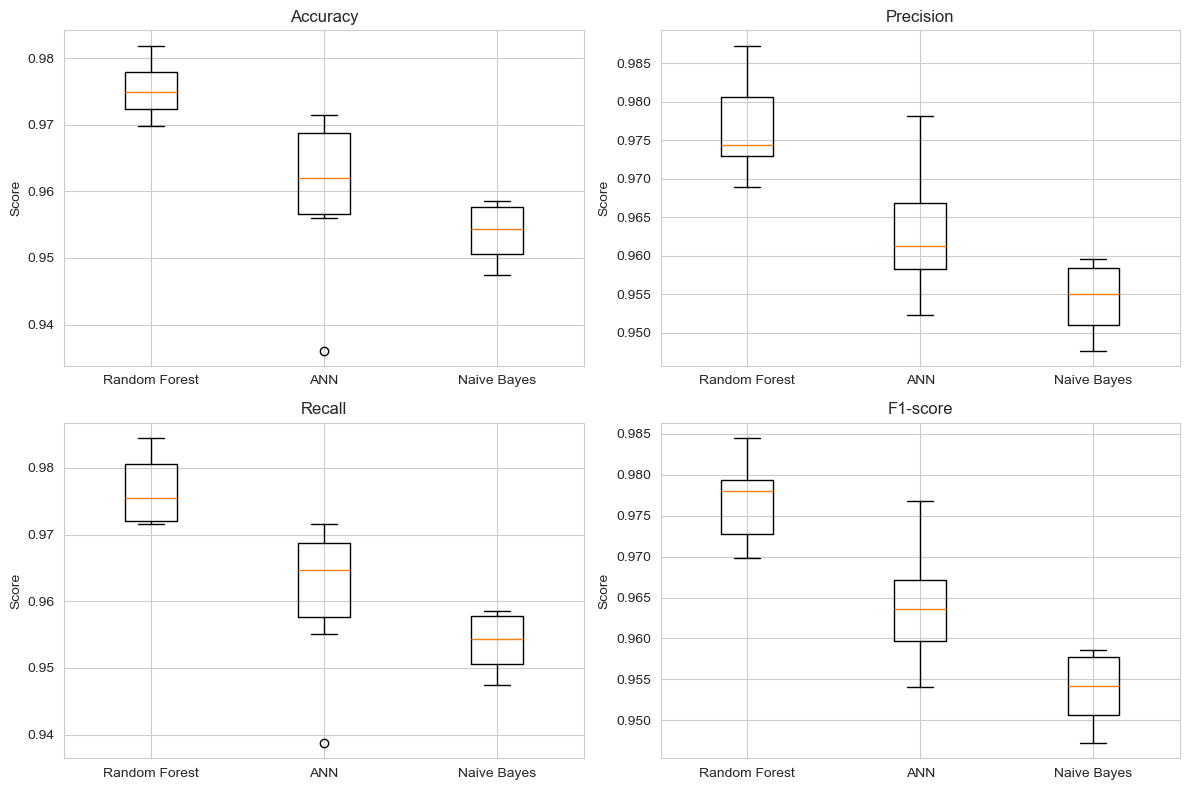

In [62]:
# Visualisasi hasil
plt.figure(figsize=(12, 8))

# Akurasi
plt.subplot(2, 2, 1)
plt.boxplot(accuracy_results.values(), labels=accuracy_results.keys())
plt.title('Accuracy')
plt.ylabel('Score')

# Precision
plt.subplot(2, 2, 2)
plt.boxplot(precision_results.values(), labels=precision_results.keys())
plt.title('Precision')
plt.ylabel('Score')

# Recall
plt.subplot(2, 2, 3)
plt.boxplot(recall_results.values(), labels=recall_results.keys())
plt.title('Recall')
plt.ylabel('Score')

# F1-score
plt.subplot(2, 2, 4)
plt.boxplot(f1_results.values(), labels=f1_results.keys())
plt.title('F1-score')
plt.ylabel('Score')

plt.tight_layout()
plt.show()